In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
%matplotlib inline
ipos = pd.read_csv(r'ipo_data.csv',encoding='latin-1')
ipos

,Date,Issuer,Symbol,Lead/Joint-lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,1/13/17,Gores Holdings II,GSHTU,Deutsche Bank Securities,$10.00,$10.16,$10.25,2.50%,$0.16,$0.25,1,NaN
1,1/20/17,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,$10.00,$10.10,$10.05,0.50%,$0.10,$0.05,1,NaN
2,1/20/17,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,$19.00,$22.18,$21.65,13.95%,$3.18,$2.65,3,NaN
3,1/26/17,AnaptysBio,ANAB,Credit Suisse/ Stifel,$15.00,$16.00,$17.00,13.33%,$1.00,$2.00,2,NaN
4,1/26/17,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,$15.00,$13.29,$11.65,-22.33%,-$1.71,-$3.35,2,Missed
5,1/27/17,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,$15.00,$14.18,$14.33,-4.47%,-$0.82,-$0.67,1,NaN
6,1/27/17,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,$23.00,$25.32,$26.12,13.57%,$2.32,$3.12,3,NaN
7,1/27/17,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,$16.00,$18.00,$17.25,7.81%,$2.00,$1.25,2,NaN
8,1/27/17,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,$22.00,$25.75,$25.00,13.64%,$3.75,$3.00,2,NaN
9,2/1/17,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,$20.00,$20.15,$20.00,0.00%,$0.15,$0.00,2,Missed


In [2]:
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else
x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else
x.replace('%',''))
ipos = ipos.applymap(lambda x: x if not '(' in str(x) else
x.replace('(',''))
ipos = ipos.applymap(lambda x: x if not ')' in str(x) else
x.replace(')',''))
ipos

,Date,Issuer,Symbol,Lead/Joint-lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,1/13/17,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN
1,1/20/17,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN
2,1/20/17,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN
3,1/26/17,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN
4,1/26/17,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,-1.71,-3.35,2,Missed
5,1/27/17,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,-0.82,-0.67,1,NaN
6,1/27/17,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,3,NaN
7,1/27/17,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,2,NaN
8,1/27/17,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,2,NaN
9,2/1/17,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,2,Missed


In [3]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 12 columns):
Date                       2554 non-null object
Issuer                     2554 non-null object
Symbol                     2554 non-null object
Lead/Joint-lead Manager    2554 non-null object
Offer Price                2554 non-null object
Opening Price              2554 non-null object
1st Day Close              2554 non-null object
1st Day % Px Chng          2554 non-null object
$ Chg Opening              2554 non-null object
$ Chg Close                2554 non-null object
Star Ratings               2554 non-null object
Performed                  286 non-null object
dtypes: object(12)
memory usage: 239.5+ KB


In [4]:
ipos[ipos['Date']=='11/120']

ipos.loc[1103, 'Date'] = pd.to_datetime('2012-11-20')

In [5]:
ipos.replace('N/C',0, inplace=True)
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [6]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 12 columns):
Date                       2554 non-null datetime64[ns]
Issuer                     2554 non-null object
Symbol                     2554 non-null object
Lead/Joint-lead Manager    2554 non-null object
Offer Price                2554 non-null float64
Opening Price              2554 non-null float64
1st Day Close              2554 non-null float64
1st Day % Px Chng          2554 non-null float64
$ Chg Opening              2554 non-null float64
$ Chg Close                2554 non-null float64
Star Ratings               2554 non-null int64
Performed                  286 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 239.5+ KB


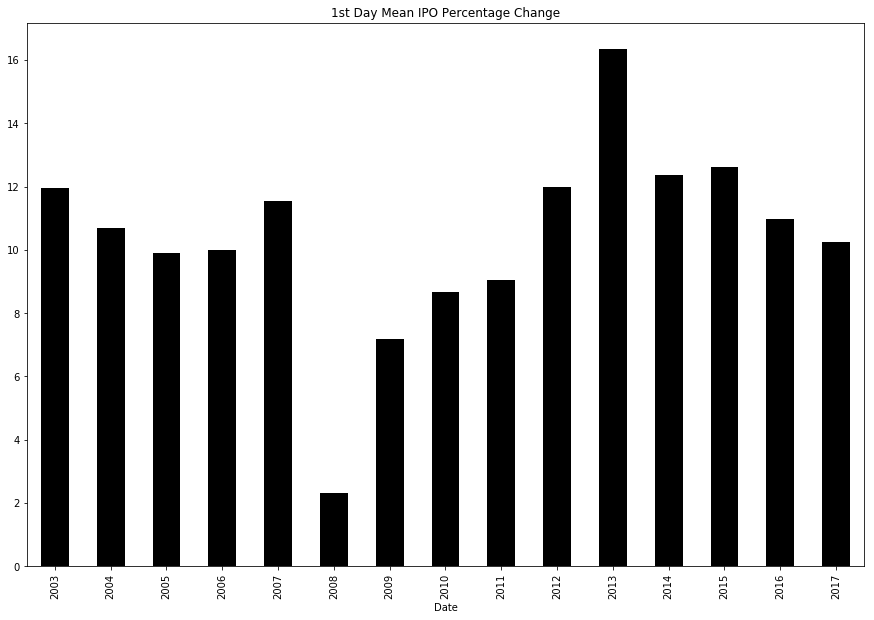

In [7]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng']\
.mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

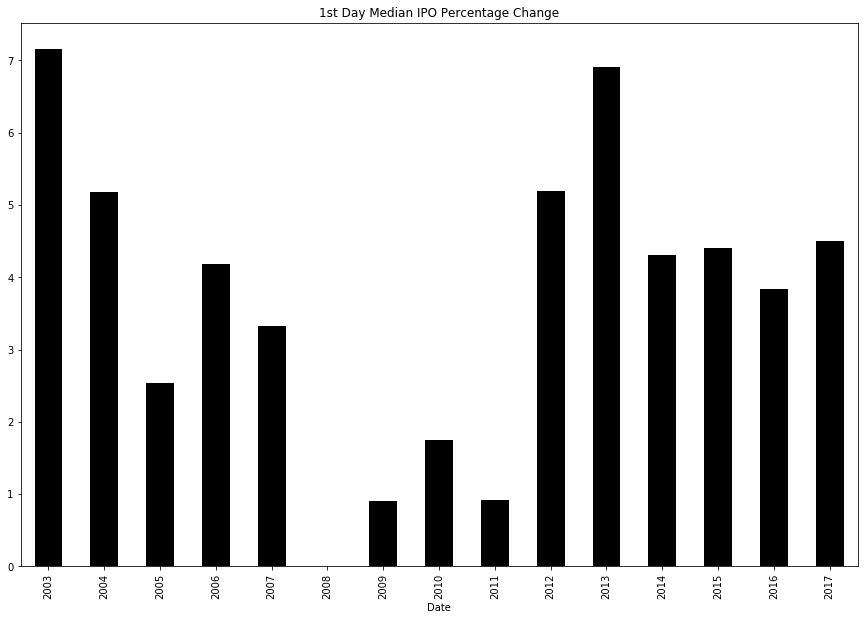

In [8]:
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Median IPO Percentage Change')

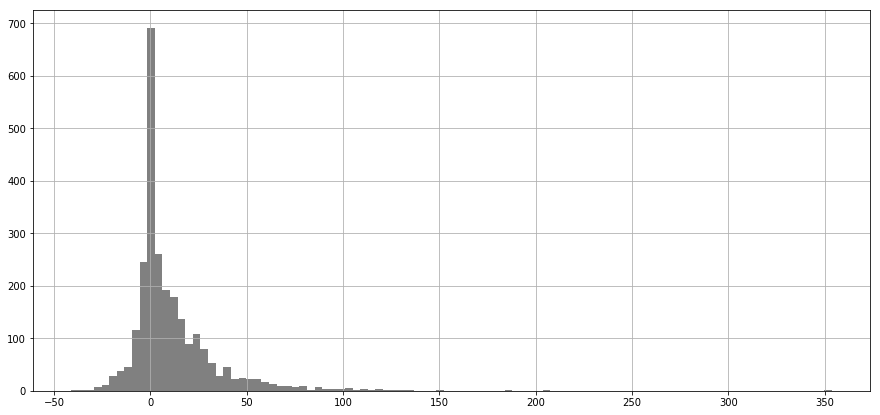

In [9]:
ipos['1st Day % Px Chng'].hist(figsize=(15,7), bins=100, color='grey')

In [10]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [11]:
ipos

,Date,Issuer,Symbol,Lead/Joint-lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN,0.09,0.885827
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN,-0.05,-0.495050
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN,-0.53,-2.389540
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN,1.00,6.250000
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,-1.71,-3.35,2,Missed,-1.64,-12.340105
5,2017-01-27,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,-0.82,-0.67,1,NaN,0.15,1.057828
6,2017-01-27,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,3,NaN,0.80,3.159558
7,2017-01-27,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,2,NaN,-0.75,-4.166667
8,2017-01-27,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,2,NaN,-0.75,-2.912621
9,2017-02-01,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,2,Missed,-0.15,-0.744417


In [12]:
ipos['% Chg Open to Close'].describe()

count    2554.000000
mean        0.872476
std         9.945247
min       -98.522167
25%        -2.823068
50%         0.000000
75%         3.609471
max       159.417476
Name: % Chg Open to Close, dtype: float64

In [13]:
ipos[ipos['% Chg Open to Close']<-98]

,Date,Issuer,Symbol,Lead/Joint-lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
2062,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1,NaN,-6.0,-98.522167


In [14]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].describe()

count    449.000000
mean       0.154454
std        1.980713
min       -6.160000
25%       -0.530000
50%        0.000000
75%        0.550000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [15]:
# ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
# ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100

In [16]:
# ipos['% Chg Open to Close'].describe()

In [17]:
ipos[ipos['Date']>='2015-01-01']['$ Chg Open to Close'].sum()

69.349999999999994

In [19]:
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    209.000000
mean       1.278565
std        2.197459
min        0.010000
25%        0.180000
50%        0.650000
75%        1.450000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [25]:
sp = pd.read_csv('GSPC.csv')
sp.sort_values('Date', inplace=True)
sp.reset_index(drop=True, inplace=True)
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-08,2646.209961,2651.649902,2644.100098,2651.500000,2651.500000,3106150000
1,2017-12-11,2652.189941,2660.330078,2651.469971,2659.989990,2659.989990,3091950000
2,2017-12-12,2661.729980,2669.719971,2659.780029,2664.110107,2664.110107,3555680000
3,2017-12-13,2667.590088,2671.879883,2662.850098,2662.850098,2662.850098,3542370000
4,2017-12-14,2665.870117,2668.090088,2652.010010,2652.010010,2652.010010,3430030000
5,2017-12-15,2660.629883,2679.629883,2659.139893,2675.810059,2675.810059,5723920000
6,2017-12-18,2685.919922,2694.969971,2685.919922,2690.159912,2690.159912,3724660000
7,2017-12-19,2692.709961,2694.439941,2680.739990,2681.469971,2681.469971,3368590000
8,2017-12-20,2688.179932,2691.010010,2676.110107,2679.250000,2679.250000,3241030000
9,2017-12-21,2683.020020,2692.639893,2682.399902,2684.570068,2684.570068,3273390000


In [27]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
Date         19 non-null object
Open         19 non-null float64
High         19 non-null float64
Low          19 non-null float64
Close        19 non-null float64
Adj Close    19 non-null float64
Volume       19 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ KB


In [23]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 16
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [24]:
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2017-01-13
error 2017-01-20
error 2017-01-20
error 2017-01-26
error 2017-01-26
error 2017-01-27
error 2017-01-27
error 2017-01-27
error 2017-01-27
error 2017-02-01
error 2017-02-01
error 2017-02-03
error 2017-02-03
error 2017-02-10
error 2017-02-10
error 2017-02-10
error 2017-03-01
error 2017-03-02
error 2017-03-08
error 2017-03-08
error 2017-03-10
error 2017-03-10
error 2017-03-15
error 2017-03-16
error 2017-03-17
error 2017-03-17
error 2017-03-24
error 2017-03-24
error 2017-03-30
error 2017-04-05
error 2017-04-06
error 2017-04-06
error 2017-04-07
error 2017-04-07
error 2017-04-11
error 2017-04-11
error 2017-04-12
error 2017-04-13
error 2017-04-13
error 2017-04-13
error 2017-04-13
error 2017-04-21
error 2017-04-27
error 2017-04-28
error 2017-04-28
error 2017-04-28
error 2017-04-28
error 2017-04-28
error 2017-04-28
error 2017-05-04
error 2017-05-04
error 2017-05-04
error 2017-05-05
error 2017-05-05
error 2017-05-05
error 2017-05-09
error 2017-05-09
error 2017-05-10
error 2017-05-

error 2014-11-07
error 2014-11-07
error 2014-11-10
error 2014-11-12
error 2014-11-13
error 2014-11-13
error 2014-11-13
error 2014-11-13
error 2014-11-14
error 2014-11-14
error 2014-11-14
error 2014-11-14
error 2014-11-17
error 2014-11-17
error 2014-11-18
error 2014-11-20
error 2014-11-20
error 2014-11-20
error 2014-11-21
error 2014-11-21
error 2014-12-03
error 2014-12-11
error 2014-12-11
error 2014-12-12
error 2014-12-12
error 2014-12-12
error 2014-12-12
error 2014-12-12
error 2014-12-12
error 2014-12-12
error 2014-12-12
error 2014-12-17
error 2014-12-17
error 2014-12-18
error 2014-12-19
error 2013-01-15
error 2013-01-17
error 2013-01-18
error 2013-01-18
error 2013-01-18
error 2013-01-25
error 2013-01-25
error 2013-01-29
error 2013-01-29
error 2013-01-31
error 2013-01-31
error 2013-02-01
error 2013-02-06
error 2013-02-07
error 2013-02-08
error 2013-02-08
error 2013-02-08
error 2013-02-12
error 2013-02-14
error 2013-02-15
error 2013-03-05
error 2013-03-07
error 2013-03-13
error 2013-03-

error 2011-05-26
error 2011-05-26
error 2011-05-26
error 2011-05-31
error 2011-06-09
error 2011-06-09
error 2011-06-15
error 2011-06-15
error 2011-06-16
error 2011-06-17
error 2011-06-21
error 2011-06-22
error 2011-06-22
error 2011-06-24
error 2011-06-29
error 2011-06-30
error 2011-06-30
error 2011-07-14
error 2011-07-15
error 2011-07-15
error 2011-07-20
error 2011-07-20
error 2011-07-21
error 2011-07-22
error 2011-07-22
error 2011-07-27
error 2011-07-27
error 2011-07-27
error 2011-07-28
error 2011-07-28
error 2011-07-28
error 2011-07-28
error 2011-07-29
error 2011-08-04
error 2011-08-11
error 2011-08-11
error 2011-08-17
error 2011-10-14
error 2011-10-19
error 2011-10-25
error 2011-11-03
error 2011-11-04
error 2011-11-04
error 2011-11-08
error 2011-11-09
error 2011-11-11
error 2011-11-11
error 2011-11-11
error 2011-11-16
error 2011-11-16
error 2011-11-17
error 2011-11-17
error 2011-11-18
error 2011-11-18
error 2011-11-18
error 2011-11-18
error 2011-11-23
error 2011-12-02
error 2011-12-

error 2007-09-11
error 2007-09-18
error 2007-09-24
error 2007-09-26
error 2007-09-27
error 2007-09-27
error 2007-10-02
error 2007-10-02
error 2007-10-03
error 2007-10-04
error 2007-10-04
error 2007-10-04
error 2007-10-09
error 2007-10-09
error 2007-10-09
error 2007-10-10
error 2007-10-10
error 2007-10-15
error 2007-10-16
error 2007-10-17
error 2007-10-17
error 2007-10-17
error 2007-10-18
error 2007-10-18
error 2007-10-18
error 2007-10-22
error 2007-10-22
error 2007-10-22
error 2007-10-23
error 2007-10-23
error 2007-10-24
error 2007-10-24
error 2007-10-24
error 2007-10-24
error 2007-10-25
error 2007-10-29
error 2007-10-30
error 2007-10-30
error 2007-10-31
error 2007-11-01
error 2007-11-01
error 2007-11-01
error 2007-11-01
error 2007-11-05
error 2007-11-06
error 2007-11-06
error 2007-11-06
error 2007-11-06
error 2007-11-06
error 2007-11-07
error 2007-11-07
error 2007-11-07
error 2007-11-07
error 2007-11-08
error 2007-11-08
error 2007-11-08
error 2007-11-08
error 2007-11-08
error 2007-11-

error 2005-09-20
error 2005-09-21
error 2005-09-22
error 2005-09-22
error 2005-09-26
error 2005-09-26
error 2005-09-27
error 2005-09-28
error 2005-09-28
error 2005-09-28
error 2005-09-28
error 2005-09-28
error 2005-09-28
error 2005-09-29
error 2005-09-29
error 2005-10-05
error 2005-10-06
error 2005-10-11
error 2005-10-12
error 2005-10-13
error 2005-10-18
error 2005-10-19
error 2005-10-21
error 2005-10-21
error 2005-10-24
error 2005-10-24
error 2005-10-26
error 2005-10-26
error 2005-10-26
error 2005-10-26
error 2005-10-28
error 2005-10-28
error 2005-11-01
error 2005-11-01
error 2005-11-01
error 2005-11-08
error 2005-11-08
error 2005-11-08
error 2005-11-08
error 2005-11-10
error 2005-11-10
error 2005-11-10
error 2005-11-14
error 2005-11-15
error 2005-11-16
error 2005-11-17
error 2005-11-17
error 2005-11-17
error 2005-11-21
error 2005-11-21
error 2005-11-21
error 2005-11-29
error 2005-12-01
error 2005-12-06
error 2005-12-09
error 2005-12-09
error 2005-12-09
error 2005-12-12
error 2005-12-